## Team Project 1: Model Evaluation

### Part 4: Model Evaluation

#### By Julia REN

### Overview
In this section, we will evaluate the performance of various machine learning models trained on our imbalanced dataset. The goal is to determine which models perform well or poorly based on specific evaluation metrics, gain insights into the significance of different features, and identify strategies to enhance model performance.

### Objectives
1. **Evaluate Model Performance**:
   - Assess each model using appropriate evaluation metrics for imbalanced data.
   - Compare models based on their performance scores.

2. **Metrics Used**:
   - **Precision**: The ratio of correctly predicted positive observations to the total predicted positives.
   - **Recall (Sensitivity)**: The ratio of correctly predicted positive observations to all the observations in the actual class.
   - **F1 Score**: The weighted average of Precision and Recall.
   - **ROC-AUC**: The Area Under the Receiver Operating Characteristic Curve, which plots true positive rate against false positive rate.

3. **Feature Importance Analysis**:
   - Determine the importance of each feature in the prediction process.
   - For logistic regression models, use p-values and coefficients.
   - For tree-based models, use feature importance scores.

4. **Scenarios of Model Performance**:
   - Identify scenarios where models perform well.
   - Identify scenarios where models perform poorly.
   - Propose strategies to improve model performance in these scenarios.

5. **Visualization**:
   - Create visualizations to compare model performance.
   - Plot feature importance to highlight key predictors.

### Methodology
1. **Train-Test Split & SMOTE**:
   - Split the dataset into training and testing subsets to ensure unbiased evaluation.
   - SMOTE is applied to the training set to balance the classes.

      ```
      desired_ratio = 0.5  # aim for a 50-50 balance
      smote = SMOTE(sampling_strategy=desired_ratio, random_state=random_seed)
      X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

2. **Cross-Validation**:
   - Use cross-validation to assess model performance and avoid overfitting.

3. **Hyperparameter Tuning**:
   - Perform hyperparameter tuning to optimize model parameters.
      ```
      model_params = {
         'Logistic Regression': [
               {
                  'C': [10**i for i in range(-3, 4)],  # Regularization strength
                  'penalty': ['l2'],  # Regularization type
                  'solver': ['lbfgs', 'sag'],  # Solvers that support 'l2' penalties
                  'class_weight': [class_weight_dict]  # Handle class imbalance
               },
               {
                  'C': [10**i for i in range(-3, 4)],  # Regularization strength
                  'penalty': ['l1'],  # Regularization type
                  'solver': ['liblinear', 'saga'],  # Solvers that support 'l1' penalties
                  'class_weight': [class_weight_dict]  # Handle class imbalance
               }
         ],
         'Decision Tree Classifier': {
               'max_depth': [3, 5, None],  # Tree depth
               'class_weight': [class_weight_dict]  # Handle class imbalance
         },
         'Random Forest Classifier': {
               'n_estimators': [50, 100, 200],  # Increase the number of estimators
               'max_depth': [None, 10, 20],  # Adjust max_depth for deeper trees
               'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
               'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
               'class_weight': [class_weight_dict]  # Handle class imbalance
         },
         'Gradient Boosting Classifier': {
               'n_estimators': [50, 100, 200],  # Number of boosting stages
               'learning_rate': [0.1, 0.5, 1.0],  # Step size for each boosting iteration
               'subsample': [0.8, 1.0],
               'min_samples_split': [2, 5, 10],
               'max_depth': [3, 5, 7]
         }
      }

4. **Model Evaluation**:
   - Evaluate each model using the defined metrics.
   - Perform detailed analysis using confusion matrices, ROC curves, and other relevant visualizations.
   -  1. Analysis of the Classification Report
      ```            
                     precision  recall  f1-score   support

               0       0.90      0.48      0.62      1685
               1       0.16      0.65      0.25       257

         accuracy                          0.50      1942
         macro avg     0.53      0.56      0.44      1942
      weighted avg     0.80      0.50      0.57      1942
      ```
      - Overall Performance
      - **Accuracy:** 50%, equivalent to random guessing.
      - **Macro Average:** Limited discriminative power.
      - **Weighted Average:** High precision driven by class 0, but low recall indicates bias towards the majority class.

      - Summary
      - **Class 0:** Precise but misses many true instances.
      - **Class 1:** Poor performance with many false positives.
      - **Overall:** The model is imbalanced, performing poorly in distinguishing between classes.

   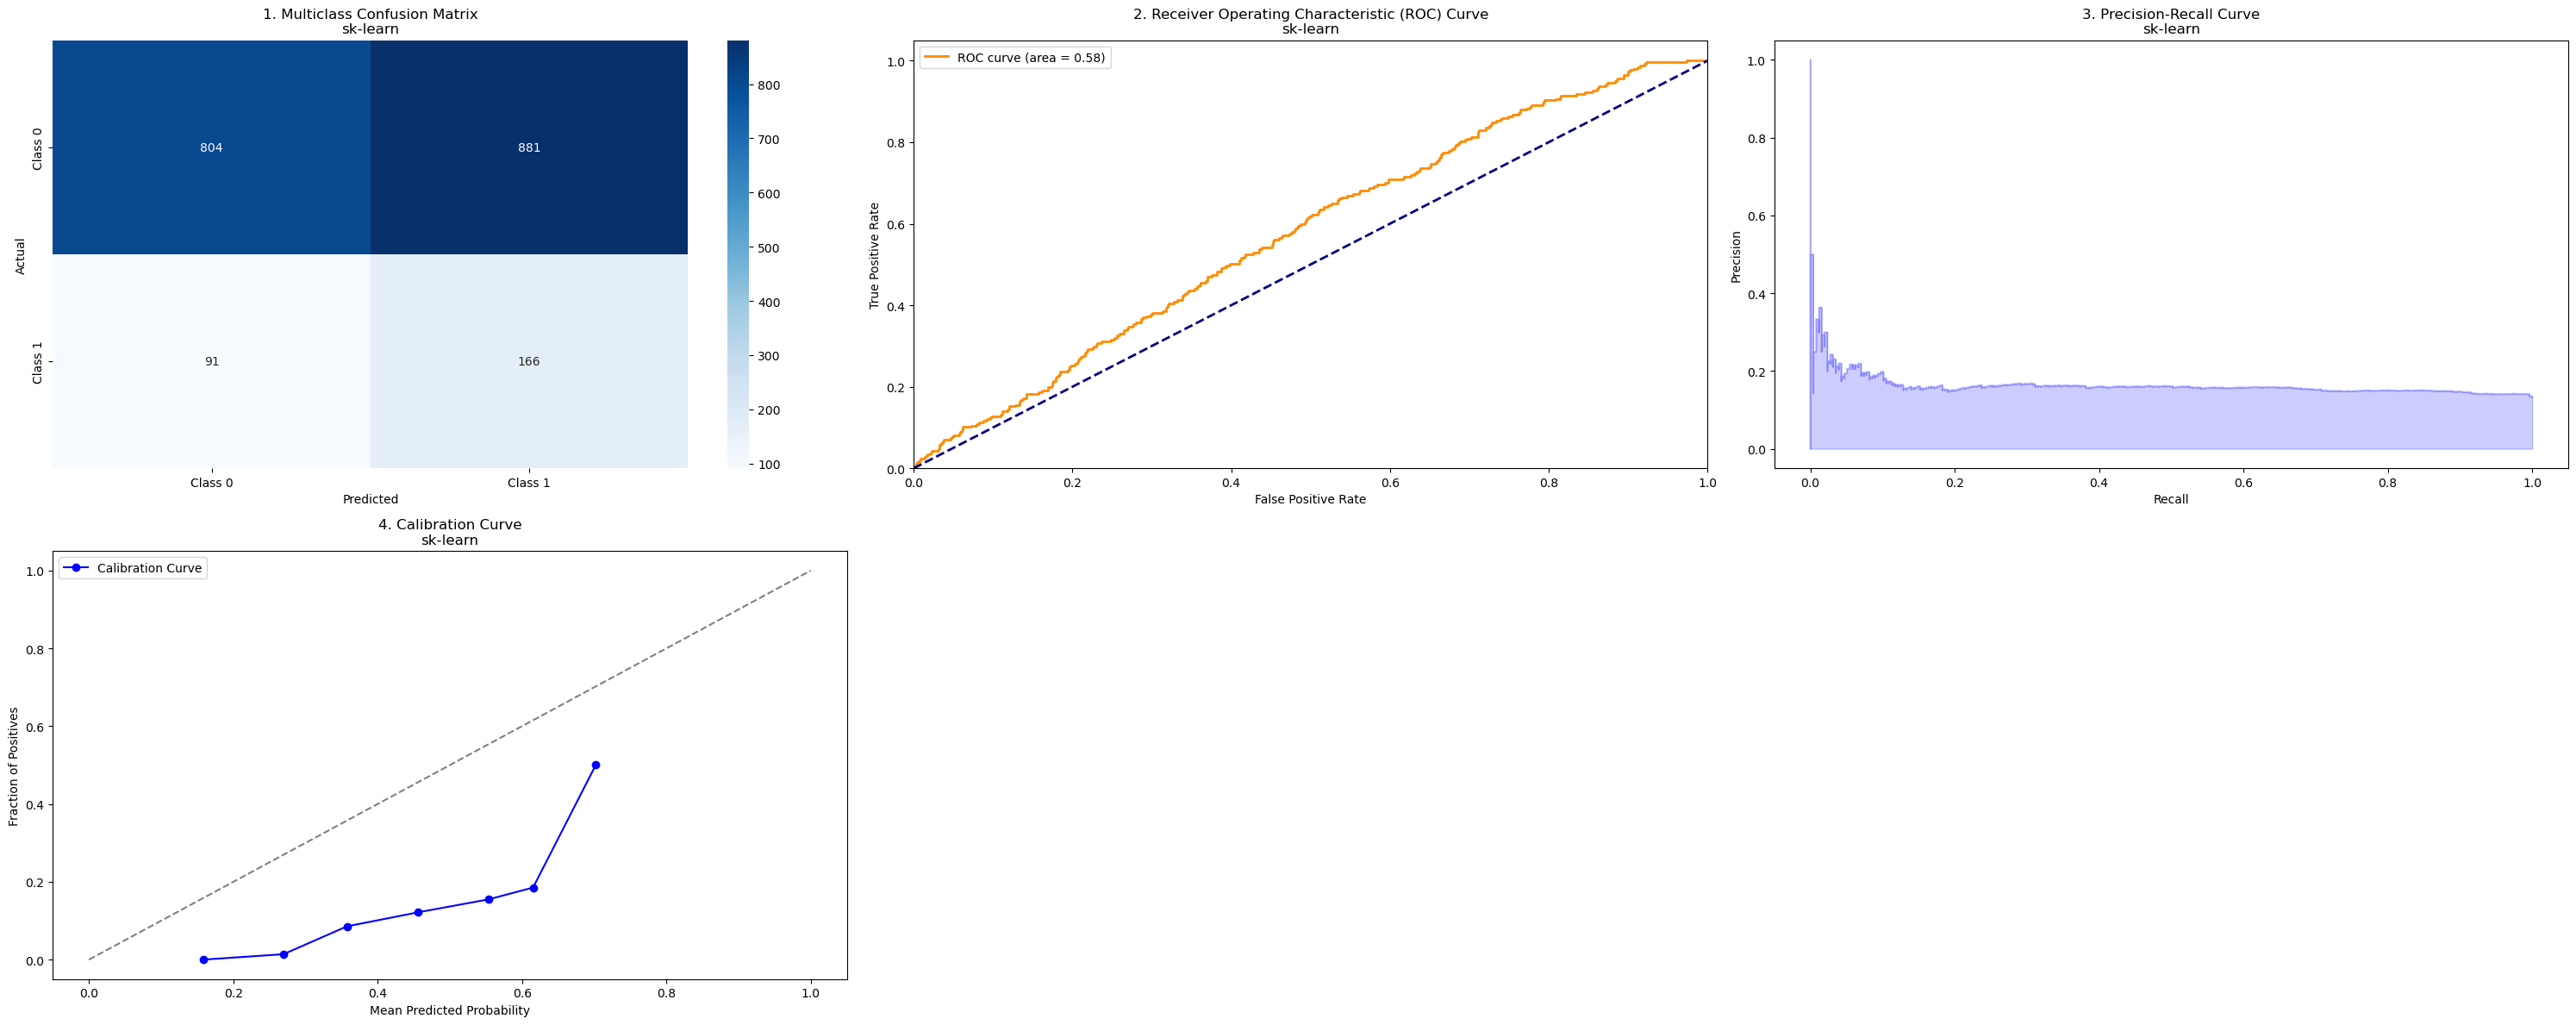 

   - 2. Analysis of the Confusion Matrix (CM)

      - Results:
         - Class 0: 804 True Negatives, 881 False Positives
         - Class 1: 91 False Negatives, 166 True Positives
      - Interpretation:
         - The classifier is correctly identifying class 0 instances (804 correct out of 1685).
         - However, it is incorrectly classifying many class 1 instances as class 0 (91 correct out of 257).

   - 3. Analysis of the ROC-AUC Curve and Confusion Matrix(CM)
   
      - **Observation:** The ROC curve is almost close to the line y=x, indicating that the classifier is performing no better than random chance.
      - **Implication:** The classifier is struggling to distinguish between the two classes.

   - 4. Analysis of the Decision Boundaries Plot
   
   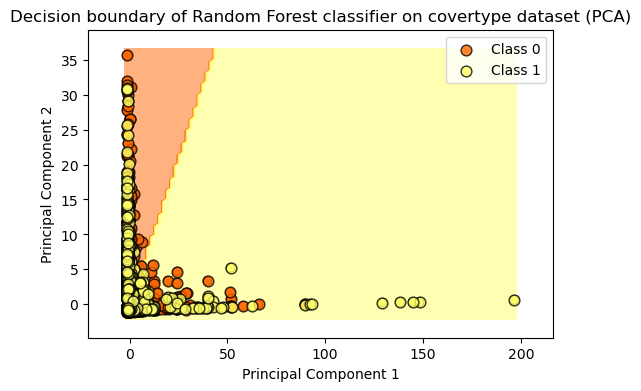

      - The plot reveals clustering of points around y = 0, indicating inadequate separation between class 1 and class 0.

         - **Bias towards class 0:** The model predominantly predicts class 0, overlooking distinctions with class 1.
         
         - **Feature space limitation:** Insufficient dimensions or suboptimal feature selection impede clear boundary definition.

      - To improve:

         - **Balance samples:** Employ techniques like SMOTE to bolster minority class representation.
         
         - **Explore complex models:** Consider ensemble methods for improved generalization.

         - **Refine features:** Optimize feature selection to enhance discrimination.


5. **Model Improvement Strategies**:
   - Feature engineering
   - Pipeline application
      ```
      pipeline_name = f'{name} (Degree {degree}) (C={params["C"]}, penalty={params["penalty"]})'
                     classification_pipelines[pipeline_name] = Pipeline([
                        ("poly_features", PolynomialFeatures(degree=degree, include_bias=False)),
                        (f"{model_step_name}",  GridSearchCV(model, params, cv=5,scoring=scoring, error_score='raise'))
                     ])
      ```
   - Model ensembling
      ```
      ensemble_model_list =['Random Forest Classifier', 'Logistic Regression','Gradient Boosting Classifier']

      ```
   - Class balancing techniques (SMOTE & model class_weight)
   - Hyperparameter tuning 

### Expected Outcomes
- A detailed comparison of model performance.
- Insights into which models perform best and which perform poorly for the given dataset.
- Identification of the most important features affecting model predictions.
- Visualizations that clearly depict model performance and feature importance.
- Strategies and improvements to enhance the performance of underperforming models.

### Conclusion

- Following a thorough evaluation of diverse machine learning models to discern their respective merits and limitations, the insights garnered facilitated the selection of the most suitable model for our specific application. This process not only illuminated the critical determinants influencing predictive outcomes but also enabled **refinement strategies** to enhance the performance of underperforming models. 

- Moreover, visual analytics proved instrumental in identifying potential **data incompleteness**. Despite deploying various models and advanced techniques aimed at improving predictive accuracy, the attained precision consistently fell below 30%, with recall hovering around 50%. Subsequent investigation uncovered a probable absence of essential data pertaining to individual credit scores within the credit card application dataset. This deficiency significantly hindered the model's ability to make informed decisions based on this pivotal feature.

### 0. Getting Started - Import Libraries 

We import our standard libraries and specific objects/libraries at the top level of our notebook.

In [3]:
import warnings 
warnings.filterwarnings('ignore') # mute warning messages

from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.ensemble import BalancedRandomForestClassifier, EasyEnsembleClassifier
from imblearn.pipeline import Pipeline
from collections import Counter
from sklearn.utils.class_weight import compute_class_weight

from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from joblib import dump, load
from sklearn.base import clone

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, matthews_corrcoef
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.calibration import calibration_curve
from sklearn.metrics import roc_curve, auc, confusion_matrix, precision_recall_curve,precision_recall_fscore_support
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA
from sklearn.inspection import DecisionBoundaryDisplay

import sys
import re
import pandas as pd
import numpy as np
import os
import io
import time
from sklearn.utils import Bunch


### 1. Functions to prepare the data for effective model evaluation

In [4]:
# 1.1 Funtions to Load the dataset
def find_filepath(name):
    for root, dirs, files in os.walk('..'):
        for file in files:
            base, extension = os.path.splitext(file)
            if extension.lower() in ('.txt', '.csv'):
                if os.path.splitext(name)[1]:  # If name has an extension
                    if file.lower() == name.lower():  # Compare filename with name
                        file_path = os.path.join(root, file)
                        if os.path.isfile(file_path):
                            return file_path
                else:  # If name does not have an extension
                    if base == os.path.splitext(name)[0]:  # Compare base part of filename with name
                        file_path = os.path.join(root, file)
                        if os.path.isfile(file_path):
                            return file_path
    return None

def get_dataframe(data):
    if isinstance(data, pd.DataFrame):
        return data
    else:
        return pd.DataFrame(data)

def capitalize_first_letter(word):
    # Capitalize the first letter and convert the rest of the word to lowercase
    return word[:1].upper() + word[1:].lower()

def load_dataset(name, sept =';', infer_datetime = True, low_mem=False):
    time_series=False
    file_path=find_filepath(name)
    if file_path:
        data = pd.read_csv(
                file_path, 
                sep=sept, 
                infer_datetime_format=infer_datetime,  
                na_values='?', 
                low_memory=low_mem # load all data into memory at one time to facilitate to infer the data types
        )

        original_column_list = data.columns.tolist()
        # Convert all elements to lowercase
        lowercase_column_list = [element.lower() for element in original_column_list]
        if 'date' in lowercase_column_list and 'time' in lowercase_column_list:
            for col in original_column_list:
                if col.lower() == 'date':
                    data = data.rename(columns={col: 'Date'})
                elif col.lower() == 'time':
                    data = data.rename(columns={col: 'Time'})
            data['datetime']= pd.to_datetime(data['Date'] + ' ' + data['Time'], format='%d/%m/%Y %H:%M:%S', errors='coerce')
            # Optional: Handle any rows where datetime parsing failed by filling with NaN
            data['datetime'].fillna(pd.NaT, inplace=True)
            
            time_series =True
            data = data.drop(columns = ['Date','Time'])
    
        return data, time_series
    else: 
        return 'No dataset named ' + capitalized_name


In [5]:
# 1.2 Functions to Preprocess the dataset
# Define a one-hot encoding function
def one_hot_encoder(X, cat_features):
    # Create a new DataFrame to store encoded columns
    encoded_df = pd.DataFrame()
    
    # Initialize OneHotEncoder
    encoder = OneHotEncoder(handle_unknown='ignore')
    
    # Iterate over each categorical feature
    for feature in cat_features:
        # Fit-transform the feature and append to encoded_df
        encoded_cols = encoder.fit_transform(X[[feature]]).toarray()
        encoded_df = pd.concat([encoded_df, pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out([feature]))], axis=1)
    
    return encoded_df

# Define a wrapper function to work with FunctionTransformer
def one_hot_encode_wrapper(X, cat_features):
    encoded_data = one_hot_encoder(X, cat_features)
    return encoded_data

# Define the frequency encoding function
def frequency_encoder(X, cat_feature):
    freq = X[cat_feature].value_counts(normalize=True)
    return X[cat_feature].map(freq).fillna(0)

# Define a wrapper function to work with FunctionTransformer
def frequency_encode_wrapper(X, cat_feature):
    return pd.DataFrame(frequency_encoder(X, cat_feature))

# Function to check cardinality
def get_cardinality(df, columns):
    cardinalities = {}
    for col in columns:
        # print(col)
        unique_values = df[col].dropna().unique()  # Drop NaNs and get unique values
        cardinalities[col] = len(unique_values)  # Count the number of unique values

    return cardinalities

# Function to check if columns are binary or non-binary, including handling of null values
def check_binary_columns(data, columns):
    binary_columns = []
    non_binary_columns = []
    label_encoders = {}
    for col in columns:
        unique_values = data[col].dropna().unique()
        if set(unique_values) <= {0, 1}:
            binary_columns.append(col)
        else:
            non_binary_columns.append(col)
    return binary_columns, non_binary_columns
    
def get_num_cat_columns(dataframe):
    # Define numeric, categorical, and datetime features
    numeric_features = []
    categorical_features = []
    datetime_features = []

    for col in dataframe.columns:
        if dataframe[col].dtype in ['int64', 'float64']:
            # Exclude binary columns
            unique_values = dataframe[col].dropna().unique()
            if len(unique_values) > 2:  # More than 2 unique values (not binary)
                numeric_features.append(col)
            else:  # Binary columns
                categorical_features.append(col)
        elif dataframe[col].dtype == 'object' or dataframe[col].dtype.name == 'category':
            categorical_features.append(col)
        elif dataframe[col].dtype == 'datetime64[ns]':
            datetime_features.append(col)

    print("Numeric Features:", numeric_features)
    print("Categorical Features:", categorical_features)
    print("Datetime Features:", datetime_features)
    return numeric_features, categorical_features, datetime_features

def data_preprocess(data, scale =False):
    dataframe = get_dataframe(data)

    # 0. Create empty DataFrames for transformed numeric and categorical data
    X_num_transformed = pd.DataFrame()
    X_cat_transformed = pd.DataFrame()

    # Define numeric， categorical and datetime features
    numeric_features, categorical_features, datetime_features = get_num_cat_columns(data)

    # 1. Process numeric features
    if len(numeric_features) > 0:      
        # Define numeric transformer and handling the missing values
        imputer_num = SimpleImputer(strategy='constant', fill_value=0)
        X_num_imputed = pd.DataFrame(imputer_num.fit_transform(dataframe[numeric_features]), columns=numeric_features)

    if scale:
        scaler = StandardScaler()
        X_num_transformed = pd.DataFrame(scaler.fit_transform(X_num_imputed), columns=numeric_features)
    else:
        X_num_transformed = X_num_imputed

    # 2. Process datetime features
    if len(datetime_features) > 0:
        # Interpolate missing values in datetime columns
        for datetime_feature in datetime_features:
            dataframe[datetime_feature] = dataframe[datetime_feature].interpolate(method='linear')

    # 3. Process categorical features
    # 3.0 Handingling missing data
    if len(categorical_features) > 0:
        imputer_cat = SimpleImputer(strategy='most_frequent')
        X_cat_imputed = pd.DataFrame(imputer_cat.fit_transform(dataframe[categorical_features]), columns= categorical_features)

        # 3.1 Check the columns is binary or not
        binary_categorical_columns, non_binary_categorical_columns = check_binary_columns(X_cat_imputed, categorical_features)
        # 3.2 Apply LabelEncoder to binary categorical columns
        label_encoders = {}
        for col in binary_categorical_columns:
            label_encoder = LabelEncoder()
            X_cat_imputed[col] = label_encoder.fit_transform(X_cat_imputed[col])
            label_encoders[col] = label_encoder
        # 3.3 Check cardinality of non_binary categorical columns
        cardinality = get_cardinality(X_cat_imputed, non_binary_categorical_columns)

        # Determine encoding based on cardinality
        low_cardinality_cols = [col for col in cardinality if cardinality[col] < 10]
        high_cardinality_cols = [col for col in cardinality if cardinality[col] >= 10]

        # 3.4 One-hot encoding for low cardinality columns
        if len(low_cardinality_cols) > 0:
            # print("Applying one-hot encoding to low cardinality columns:", low_cardinality_cols)
            X_cat_one_hot = one_hot_encoder(X_cat_imputed, low_cardinality_cols)
            X_cat_transformed = pd.concat([X_cat_transformed, X_cat_one_hot], axis=1)
        # 3.5 Frequency encoding for high cardinality columns
        if len(high_cardinality_cols) >0:
            # print("Applying frequency encoding to high cardinality columns:", high_cardinality_cols)
            for col in high_cardinality_cols:
                X_cat_transformed[col + '_freq_encoded'] = frequency_encode_wrapper(X_cat_imputed, col)
        # Add binary columns to X_cat_transformed
        X_cat_transformed = pd.concat([X_cat_transformed, X_cat_imputed[binary_categorical_columns]], axis=1)

    # Combine processed numeric, datetime and categorical features
    X_transformed = pd.concat([X_num_transformed, X_cat_transformed, dataframe[datetime_features] ], axis=1)

    return X_transformed, X_num_transformed.columns, X_cat_transformed.columns

In [6]:
# 1.3 SubFuncitions for model fitting
def generate_hidden_layer_sizes(X_train):
        # Determine the size of the training data
        num_features = X_train.shape[1]
        
        # Define a range of hidden layer sizes based on the size of the training data
        hidden_layer_sizes = [
            tuple(np.random.randint(50, 101, size=np.random.randint(1, num_features + 1))) 
            for _ in range(3)
        ]
        return hidden_layer_sizes
    
# Define a function to generate dynamic parameter values
def generate_param_range(start, end, step):
    return np.arange(start, end + step, step)

def get_pipelines_list(X_train,y_train, degree_list,model_step_name):

    # 4. Define Classification Models
    # Define VotingClassifier
    ensemble_model_list =['Random Forest Classifier', 'K-Neighbors Classifier', 'Gradient Boosting Classifier']

    models = {
        'Logistic Regression': LogisticRegression(max_iter=10000),
        # 'Decision Tree Classifier': DecisionTreeClassifier(),
        # 'Random Forest Classifier': RandomForestClassifier(),
        # 'Gradient Boosting Classifier': GradientBoostingClassifier(),
        # 'XGBoost Classifier': xgb.XGBClassifier(),
        # 'Balanced Random Forest Classifier': BalancedRandomForestClassifier(),
        # 'Easy Ensemble Classifier': EasyEnsembleClassifier(),
        # 'Support Vector Classifier': SVC(probability=True),
        # 'K-Neighbors Classifier': KNeighborsClassifier(),
        # 'Neural Network': MLPClassifier(),  # Example, use appropriate neural network model
        # 'Regularized Linear Model': LogisticRegression(max_iter=10000, penalty='l2'),  
    }
    # Define hyperparameters for models where applicable
    # Determine if the dataset is large or small based on the length of X_train
    if len(X_train) > 1000:  # Adjust this threshold based on your specific dataset size
        start, stop, step = 10, 51, 10  # Start from 10, go up to 50 (inclusive), with a step of 10
    else:
        start, stop, step = 3, 21, 2 # Start from 3, go up to 9 (inclusive), with a step of 2
    # Generate the continuous k_range
    k_range = list(range(start, stop, step))

    # Define the dynamic parameter ranges
    alpha_range = generate_param_range(0.1, 10, 0.1)

    # To address one-hot encoded column instead of original categorical column
    # Compute class weights
    class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
    # Create a dictionary mapping class indices to weights
    class_weight_dict = {i: weight for i, weight in enumerate(class_weights)}

    model_params = {
        'Logistic Regression': [
            {
                'C': [10**i for i in range(-3, 4)],  # Regularization strength
                'penalty': ['l2'],  # Regularization type
                'solver': ['lbfgs', 'sag'],  # Solvers that support 'l2' penalties
                'class_weight': [class_weight_dict]  # Handle class imbalance
            },
            {
                'C': [10**i for i in range(-3, 4)],  # Regularization strength
                'penalty': ['l1'],  # Regularization type
                'solver': ['liblinear', 'saga'],  # Solvers that support 'l1' penalties
                'class_weight': [class_weight_dict]  # Handle class imbalance
            }
        ],
        'Decision Tree Classifier': {
            'max_depth': [3, 5, None],  # Tree depth
            'class_weight': [class_weight_dict]  # Handle class imbalance
        },
        'Random Forest Classifier': {
            'n_estimators': [50, 100, 200],  # Increase the number of estimators
            'max_depth': [None, 10, 20],  # Adjust max_depth for deeper trees
            'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
            'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
            'class_weight': [class_weight_dict]  # Handle class imbalance
        },
        'Gradient Boosting Classifier': {
            'n_estimators': [50, 100, 200],  # Number of boosting stages
            'learning_rate': [0.1, 0.5, 1.0],  # Step size for each boosting iteration
            'subsample': [0.8, 1.0],
            'min_samples_split': [2, 5, 10],
            'max_depth': [3, 5, 7]
        },
        'XGBoost Classifier': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.1, 0.5, 1.0],
            'max_depth': [3, 5, 7],
            'min_child_weight': [1, 3, 5],
            'subsample': [0.8, 1.0],
            'colsample_bytree': [0.8, 1.0],
            'gamma': [0, 0.1, 0.2],
            'reg_alpha': [0, 0.1, 0.5],
            'reg_lambda': [0, 0.1, 1.0]
        },
        'Balanced Random Forest Classifier': {
            'n_estimators': [50, 100, 200],
            'max_features': ['sqrt', 'log2', None],
            'min_samples_split': [2, 5, 10],
            'max_depth': [3, 5, 7]
        },
        'Easy Ensemble Classifier': {
            'n_estimators': [10, 50, 100]
        },
        'Support Vector Classifier': {
            'C': [10**i for i in range(-3, 4)],  # Regularization strength
            'kernel': ['linear', 'rbf']  # Kernel type
        },
        'K-Neighbors Classifier': {
            'n_neighbors': k_range,
            'weights': ['uniform', 'distance'],
            'metric': ['euclidean', 'manhattan'],
            'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
            'weights' : ['uniform','distance']
        },
        'Neural Network': {
            'hidden_layer_sizes': generate_hidden_layer_sizes(X_train)  # Neural network architecture
        },
        'Regularized Linear Model': {
            'C': alpha_range  # Regularization strength
        }
    }
    # models['Voting Ensemble'] = VotingClassifier(estimators=[
    #     (name, model) for name, model in models.items() if name in ensemble_model_list
    # ], voting='soft')

    ensemble_params = {}
    for model_name, params in model_params.items():
        if model_name in ensemble_model_list:
            for param, values in params.items():
                ensemble_params[f'{model_name}__{param}'] = values
    model_params['Voting Ensemble']= ensemble_params
    
    # 5. Train and Evaluate Models
    # Default to linear (degree 1) if degree_list is None or empty
    if degree_list is None:
        degree_list = [1]
    else:
        if not isinstance(degree_list, list):
            print('Degree list is not a list.')
            degree_list = [degree_list]  # Ensure degree_list is converted to a list if it's not already
        if 1 not in degree_list:
            degree_list.append(1)  

    classification_pipelines ={}
    for name, model in models.items():
        if name == 'Logistic Regression':
            for degree in degree_list:
                for params in model_params[name]:
                    pipeline_name = f'{name} (Degree {degree}) (C={params["C"]}, penalty={params["penalty"]})'
                    classification_pipelines[pipeline_name] = Pipeline([
                        ("poly_features", PolynomialFeatures(degree=degree, include_bias=False)),
                        (f"{model_step_name}",  GridSearchCV(model, params, cv=5,scoring='roc_auc', error_score='raise'))
                    ])
        elif name == 'K-Neighbors Classifier':
            pipeline_name = f'{name} (Degree 1) (Soft Voting)'
            classification_pipelines[pipeline_name] = Pipeline([
                ('scaler', StandardScaler()),  # Scale features for KNN
                (f"{model_step_name}", GridSearchCV(model, model_params[name], cv=5, scoring='roc_auc', error_score='raise'))
            ])
        else:
            pipeline_name = f'{name} (Degree 1)'
            classification_pipelines[pipeline_name] = Pipeline([
                (f"{model_step_name}", GridSearchCV(model, model_params[name], cv=5, scoring='roc_auc', error_score='raise'))
            ])
    return classification_pipelines

def poly_transformer(X_train, X_test, degree = 1, scale=False):
    column_names=X_train.columns.tolist() 
    poly = PolynomialFeatures(degree = degree, include_bias=False)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    feature_names = poly.get_feature_names_out(column_names)
    # Convert to DataFrame to retain column names
    X_train_poly_df = pd.DataFrame(X_train_poly, columns=feature_names, index=X_train.index)
    X_test_poly_df = pd.DataFrame(X_test_poly, columns=feature_names, index=X_test.index)
    
    if scale:
        train_poly_scaled =data_preprocess(X_train_poly,True)
        test_poly_scaled =data_preprocess(X_test_poly, True)
        return train_poly_scaled, test_poly_scaled, feature_names
    return X_train_poly_df, X_test_poly_df, feature_names

def calculate_metrics(name, model_step_name, X_test, y_test, y_pred):
    metrics_dict = {}
    # Calculate the confusion matrix once
    cm = confusion_matrix(y_test, y_pred)

    if len(set(y_test)) == 2 and set(y_test) == {0, 1}:
        # Binary classification
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='binary')
        recall = recall_score(y_test, y_pred, average='binary')
        f1 = f1_score(y_test, y_pred, average='binary')
        roc_auc = roc_auc_score(y_test, y_pred)
        tn, fp, fn, tp = cm.ravel()
        specificity = tn / (tn + fp) if tn + fp != 0 else None  # Handle division by zero
        cm = confusion_matrix(y_test, y_pred)
        mcc = matthews_corrcoef(y_test, y_pred)
    else:
        # non-binary, multiclass classification
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        roc_auc = specificity = cm = mcc = None
    # Add all metrics to the dictionary
    metrics_dict = {
        'model': name,
        'Accuracy': accuracy if accuracy is not None else float('-inf'),
        'Precision': precision if precision is not None else float('-inf'),
        'Recall': recall if recall is not None else float('-inf'),
        'F1 Score': f1 if f1 is not None else float('-inf'),
        'ROC-AUC Score': roc_auc if roc_auc is not None else float('-inf'),
        'Specificity': specificity if specificity is not None else float('-inf'),
        'Confusion Matrix': cm if cm is not None else float('-inf'),
        'MCC': mcc if mcc is not None else float('-inf')
    }
    # print(metrics_dict)
    return metrics_dict


In [7]:
# 1.4 SubFunctions for visualizing model performance
def get_pipeline_model(model_name, model_step_name):
    pipeline = load(f'{model_name}.joblib')
    for step_name in pipeline.named_steps.keys():        
        if model_step_name == step_name: 
            model = pipeline.named_steps[model_step_name]
            return pipeline, model
        
    print(f"{model_step_name} is not valid in {pipeline.named_steps.keys()}")

# Define a function to get feature importances from the pipeline
def get_importances(best_model_name,model_step_name, X_train, feature_names ):
    _, model = get_pipeline_model(best_model_name, model_step_name)

    # Get all attributes from the model object
    attributes = dir(model)

    importances = None
    if 'feature_importances_' in attributes:
        print(f"The attribute has been found: feature_importances_")
        importances= model.feature_importances_

    if 'coef_' in attributes:
        if len(model.coef_) == 1:  # For binary classification
            print(f"The attribute has been found: coef_ (binary classification)")
            importances=  np.abs(model.coef_[0])
        else:  # For multiclass classification, take the average
            print(f"The attribute has been found: coef_ (multiclass classification)")
            importances=  np.abs(model.coef_.mean(axis=0))

    if 'best_estimator_' in attributes:
        best_estimator = model.best_estimator_
        best_estimator_attributes = dir(best_estimator)
            
        if 'feature_importances_' in best_estimator_attributes:
            print(f"The attribute has been found in best_estimator_: feature_importances_")
            importances=  model.best_estimator_.feature_importances_

        if 'coef_' in best_estimator_attributes:
            if len(best_estimator.coef_) == 1:  # For binary classification
                print(f"The attribute has been found in best_estimator_: coef_ (binary classification)")
                importances=  np.abs(model.best_estimator_.coef_[0])
               
            else:  # For multiclass classification, take the average
                print(f"The attribute has been found in best_estimator_: coef_ (multiclass classification)")
                importances=  np.abs(model.best_estimator_.coef_.mean(axis=0))
    
    if importances is not None and len(importances)>0 :
        # print(importances)
        num_original_features = X_train.shape[1]
        # Remove 'x0', 'x1' prefix from feature names
        feature_names = [name.replace('x0', 'x1').replace('x1', 'x2') for name in feature_names]
        # print(f"Originally, X_train contains {num_original_features} columns.")
        # print(f"after data transformation, features become {len(feature_names)},")
        # print(f" and the feature importances contain {len(importances)} values.")

        if len(importances) <= len(feature_names)+1 :
            if len(importances) == len(feature_names)+1:
                print("Removing const importance...")
                importances = importances[1:]
            # Create a DataFrame to sort and display feature importances
            # Reshape importances array if necessary
            importances = np.ravel(importances)
        else:
            # calculate the interaction terms from the feature_names 
            # importances are just importances for the original columns from X_train
            importances_original = importances
            importances_interaction = []

            for name in feature_names[num_original_features:]:
                # Split the term into components if there are spaces (' ')
                components = name.split(' ')
                importance_interaction=1
                for component in components:
                    if '^' in component:
                        base, power =component.split('^')
                    else: 
                        base =component
                        power =1 

                    base_index= feature_names.index(base)
                
                    importance_component = importances_original[base_index] ** int(power)
                    
                    importance_interaction *= importance_component
                # Append the importance of the interaction term to the list
                importances_interaction.append(importance_interaction)

            # Combine the importances for original columns and interaction terms
            importances = np.concatenate((importances_original, importances_interaction))

        feature_importance_df = pd.DataFrame({
            'feature': feature_names,
            'importance': importances
        }).sort_values(by='importance', ascending=False)

    else: 
        feature_importance_df = pd.DataFrame({
            'feature': feature_names,
            'importance': 0
        })
        print("The model does not have feature importances or coefficients.")
    # print(feature_importance_df)

    return feature_importance_df


In [8]:
# 1.5 SubFuntions for Main Function
def get_substring_up_to_second_underscore(s):
    if s.count('_') >= 2:
        match = re.match(r'([^_]*_[^_]*)_', s)
        if match:
            return match.group(0)
        return s  # Return the original string if there are less than two underscores

def get_unique_substrings_up_to_second_underscore(categorical_features):
    unique_substrings = set()  # Use a set to handle duplicates
    for sub_feature in categorical_features:
        substring = get_substring_up_to_second_underscore(sub_feature)
        unique_substrings.add(substring)
        # Use filter to drop None values and convert to list
        cleaned_unique_strings = list(filter(None, unique_substrings))
    return cleaned_unique_strings  # Convert the set back to a list if needed


### 2. Functions to fit the pipeline and get the metrics for visualization

In [9]:
def fit_classification_models(X,y,testsize,model_step_name, degree_list = None, random_seed=42):
                               
    # 3. Split the Data
    try:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=testsize, stratify=y, random_state=random_seed)
        # SMOTE is applied to the training set to balance the classes
        # Define the desired ratio of minority to majority class after SMOTE
        desired_ratio = 0.5  # aim for a 50-50 balance
        smote = SMOTE(sampling_strategy=desired_ratio, random_state=random_seed)
        X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
        # Check the class distribution after SMOTE
        print(f"Class distribution after SMOTE: {Counter(y_resampled)}")

        X_train = X_resampled
        y_train = y_resampled
        print(f"X_train contains {len(X_train)} rows.")
        print(f"X_test contains {len(X_test)} rows.")
    except Exception as e:
        print(f"An error occurred while splitting the data: {e}")
        exit()

    # 4. Get Pipelines List
    classification_pipelines = get_pipelines_list(X_train,y_train, degree_list,model_step_name)

    # 5. Train the model
    best_model_info = None
    best_model_name = None
    best_k = None
    metrics_list = []   
    # 5.1 Loop through the pipelines list
    for name, pipeline in classification_pipelines.items():
        # print(name, pipeline)
        try:
            start_time =time.time()
            # 5.2 Train each pipeline
            pipeline.fit(X_train, y_train)
            # 5.3 Predict on X_test 
            y_pred = pipeline.predict(X_test)
            end_time = time.time()
            execution_time = end_time - start_time
            minutes = int(execution_time // 60)
            seconds = int(execution_time % 60)
            print("Training Complete: ", name, ". Execution time:", minutes, "minutes and", seconds, "seconds")
            # Save the pipeline in the disk
            dump(pipeline, f"{name}.joblib")
            # 5.4 Calculate the metrics and save the pipeline to disk
            # print("Start predicting on test data and calculating metris...")
            metrics_list.append(calculate_metrics(name, model_step_name, X_test, y_test, y_pred))
            # class_report = classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1'])
            # print(class_report)
   
        except Exception as e:
            print(f"An error occurred while training and evaluating the {name} model: {e}")

    # 5.5 Sort the scores list based on the 'Accuracy' metric in descending order
    sorted_scores = sorted(metrics_list, key=lambda x: (x['ROC-AUC Score'], x['F1 Score'] ,x['Precision'], x['Recall']), reverse=True)
    print(sorted_scores)
    
    # 5.6 Return the Best Model 
    best_model_info = sorted_scores[0]
    best_model_name = best_model_info['model']
    print(f'Best model found: {best_model_name}')
    match = re.search(r'Degree (\d+)', best_model_name)
    degree = int(match.group(1))

    # 5.7 Load the pipeline and get the feature names
    # Load pipeline before use
    pipeline, model = get_pipeline_model(best_model_name,model_step_name)
    _,_, feature_names = poly_transformer(X_train, X_test, degree, False)
    # print("feature names: ", feature_names)
    # Get the best value of K from the pipeline
    if  'K-Neighbors Classifier' in best_model_name: 
        best_k = pipeline.named_steps[model_step_name].best_params_['n_neighbors']
        print(f'best-k is {best_k}')
     
    # Delete all other joblib files
    for name, pipeline in classification_pipelines.items():
        if name == best_model_name:
            pass
        else: 
            joblib_file = f'{name}.joblib'
            if os.path.exists(joblib_file):
                os.remove(joblib_file)

    # 5.8 Get top_features according to top_importance
    feature_importance_df = get_importances(best_model_name,model_step_name, X_train, feature_names)

    return best_model_name, best_model_info, feature_names, feature_importance_df

### 3. Functions to plot and evaluate for model performance

In [10]:
def plot_all_metrics(best_model_name, best_model_info, X,y, testsize,model_step_name,feature_importance_df, top_importances, random_seed, target_variable, rmote=False ):
    
    # 1. Split the data using the same way as modelfitting
    try:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=testsize, stratify=y, random_state=random_seed)
        # SMOTE is applied to the training set to balance the classes
        # Define the desired ratio of minority to majority class after SMOTE
        desired_ratio = 0.5  # aim for a 50-50 balance
        smote = SMOTE(sampling_strategy=desired_ratio, random_state=random_seed)
        X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

        X_train = X_resampled
        y_train = y_resampled
    except Exception as e:
        print(f"An error occurred while splitting the data: {e}")
        exit()


    # 2. Load pipeline before plotting
    pipeline, _ = get_pipeline_model(best_model_name, model_step_name)
    # plot_histograms(X,target_variable, y)
    plot_classification_report(pipeline,X_test, y_test)

    metrics_to_plot = [
        (plot_confusion_matrix, 'Multiclass Confusion Matrix'),
        (plot_roc_curve, 'Receiver Operating Characteristic (ROC) Curve'),
        (plot_precision_recall_curve, 'Precision-Recall Curve'),
        (plot_calibration_curve, 'Calibration Curve'),
        # (plot_feature_importances, 'Feature Importances')     
    ]
        
    # 3. Create the figure and axes
    num_metrics = len(metrics_to_plot)
    num_cols = 3
    num_rows = (num_metrics + num_cols - 1) // num_cols
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(10*num_cols, 6*num_rows))

    # Adjust the spacing between subplots
    plt.subplots_adjust(wspace=1, hspace=1) 

    # Flatten the axes array
    axes = axes.flatten()

    # Loop over the metrics and titles, plotting each one
    for i, (plot_function, function_title) in enumerate(metrics_to_plot):
                
        if function_title == 'Feature Importances':
            plot_function(pipeline,X_test, y_test, feature_importance_df, top_importances,ax=axes[i])
        elif function_title =='F1 Score, Specificity and MCC':
            
            plot_function(best_model_info, ax=axes[i])
        else:
            plot_function(pipeline,X_test, y_test, ax=axes[i])
        # Set title for the subplot
        axes[i].set_title(f'{i+1}. {function_title}\nsk-learn')

    # Hide any empty grid cells
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()
    plot_decision_boundary(pipeline, X_train,y_train,model_step_name)

# Plot 0 - Histograms
def plot_histograms(X,target_variable, y):
    X[target_variable]=y
    X.hist(bins=15, figsize=(10, 6))
    plt.suptitle = "0. Histograms\nsk-learn"
    plt.tight_layout()

    # Show the plot
    plt.show()

# Plot 0 - Classification Report
def plot_classification_report(pipeline,X_test, y_test):    
    y_pred = pipeline.predict(X_test)
    # Generate the classification report
    report = classification_report(y_test, y_pred)
    print(report)

# Plot 1 - Binary/MultiClass Confusion Matrix
def plot_confusion_matrix(pipeline ,X_test, y_test, ax):

    y_pred = pipeline.predict(X_test)
    # Extract unique class names from y_true
    class_names = np.unique(y_test)
    class_names_str = [f'Class {int(name)}' for name in class_names]  # Convert to string if needed
    # print(class_names)
    # Generate the confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=class_names)
    # print(cm)

    if ax is None: 
        ax =plt.gca()  # Get the current Axes instance if none is provided
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names_str, yticklabels=class_names_str, ax =ax)

    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')    
    
    # Free up memory after use
    del pipeline 

# Plot 2 - ROC Curve
def plot_roc_curve(pipeline,X_test,y_test,ax):
    class_names = np.unique(y_test)
    # print(f"Unique values in y_test : {class_names}")
    num_classes = len(class_names)
    # Predict probabilities for each class
    if hasattr(pipeline, "predict_proba"):  # Check if model has predict_proba method
        y_prob = pipeline.predict_proba(X_test)
    else:
        y_prob = pipeline.decision_function(X_test)
  
    if num_classes>2:

        # Compute ROC Curve and ROC area for each class
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        # Convert multi-class labels to binary labels for each class
        # Initialize LabelBinarizer
        binarizer = LabelBinarizer()
        # Fit and transform y_test to obtain binary labels
        binary_labels = binarizer.fit_transform(y_test)

        for i in range(num_classes):
            fpr[i], tpr[i], _ = roc_curve(binary_labels[:, i], y_prob[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])
            # Plot ROC Curve for each class
        for i in range(num_classes):
            ax.plot(fpr[i], tpr[i], label=f'Class {i+1} (AUC = {roc_auc[i]:.2f})', alpha=1)
            ax.fill_between(fpr[i], tpr[i])

        ax.plot([0, 1], [0, 1], 'k--', lw=2)  # Plot diagonal line for reference
        ax.set_xlim([0.0, 1.0])
        ax.set_ylim([0.0, 1.05])
        ax.set_xlabel('False Positive Rate')
        ax.set_ylabel('True Positive Rate')
        ax.legend(loc='best' , title = 'Random Forest Classifier')

    else:
        # for binary variable
        y_prob = y_prob[:, 1]
    
        fpr, tpr, thresholds = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)
       
        ax.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
        ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        ax.set_xlim([0.0, 1.0])
        ax.set_ylim([0.0, 1.05])
        ax.set_xlabel('False Positive Rate')
        ax.set_ylabel('True Positive Rate')
        
        ax.legend(loc="best")

    del pipeline

# Plot 3 - Precision-Recall Curve
def plot_precision_recall_curve(pipeline,X_test, y_test, ax):
    class_names = np.unique(y_test)
    # print(f"Unique values in y_test : {class_names}")
    num_classes = len(class_names)
    if hasattr(pipeline, "predict_proba"):  # Check if model has predict_proba method
        y_prob = pipeline.predict_proba(X_test)
    else:
        y_prob = pipeline.decision_function(X_test)  

    if num_classes>2:
        # Initialize LabelBinarizer
        binarizer = LabelBinarizer()
        # Fit and transform y_test to obtain binary labels
        binary_labels = binarizer.fit_transform(y_test)
        precision = dict()
        recall = dict()
        for i in range(num_classes):
            precision[i], recall[i], _ = precision_recall_curve(binary_labels[:, i], y_prob[:, i])
            ax.plot(recall[i], precision[i], label='Class %s' % class_names[i])

        ax.set_xlabel('Recall')
        ax.set_ylabel('Precision')
        ax.legend()
    
    else: 
        y_prob = y_prob[:, 1]
        precision, recall, _ = precision_recall_curve(y_test, y_prob)
        # print(precision, recall)
        ax.step(recall, precision, color='b', alpha=0.2, where='post')
        ax.fill_between(recall, precision, step='post', alpha=0.2, color='b')
        ax.set_xlabel('Recall')
        ax.set_ylabel('Precision')

    del pipeline

# Plot 4 - Calibration_curve
def plot_calibration_curve(pipeline,X_test,y_test, ax):
    class_names = np.unique(y_test)
    # print(f"Unique values in y_test : {class_names}")
    num_classes = len(class_names)
    if hasattr(pipeline, "predict_proba"):  # Check if model has predict_proba method
        y_prob = pipeline.predict_proba(X_test)
    else:
        y_prob = pipeline.decision_function(X_test)

    if num_classes>2: 
        # Initialize LabelBinarizer
        binarizer = LabelBinarizer()
        # Fit and transform y_test to obtain binary labels
        binary_labels = binarizer.fit_transform(y_test)
    
        # Divide Data into Bins
        bins = np.linspace(0,1,10)
        # Calculate Calibration Curves for Each Class
        for i, class_name in enumerate(class_names):
            prob_true, prob_pred = calibration_curve(binary_labels[:, i], y_prob[:, i], n_bins=10)
            
            # Plot Calibration Curve for Current Class
            ax.plot(prob_pred, prob_true, marker='o', linestyle='-', label=f'Class {class_name} Calibration')
            ax.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line for perfect calibration

        ax.set_xlabel('Mean Predicted Probability')
        ax.set_ylabel('Fraction of Positives')
        ax.legend(loc='upper left')
        ax.grid(True)

    else:
        y_prob = y_prob[:, 1]
        prob_true, prob_pred = calibration_curve(y_test, y_prob, n_bins=10)
        ax.plot(prob_pred, prob_true, marker='o', color='blue', label='Calibration Curve')
        ax.plot([0, 1], [0, 1], color='gray', linestyle='--')
        ax.set_xlabel('Mean Predicted Probability')
        ax.set_ylabel('Fraction of Positives')
        ax.legend(loc='upper left')
    
    del pipeline

# Plot 5. Feature Importances or Coefficients
def plot_feature_importances(pipeline, X_test, y_test,feature_importance_df,top_importances, ax):
    # print(feature_importance_df)
    top_feature_importance = feature_importance_df.head(top_importances)

    # Plotting the importances
    ax.hlines(y=top_feature_importance['feature'], xmin=0, xmax=top_feature_importance['importance'], color='skyblue')
    ax.plot(top_feature_importance['importance'], top_feature_importance['feature'], 'o', color='skyblue')
    ax.set_xlabel(f'Top {top_importances} Feature')
    ax.set_ylabel('Feature')
    ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability
    
# Plot 6 - Desicion Boundary 
def plot_decision_boundary(pipeline, X_train,y_train,model_step_name, ax=None):
 
    pipeline_clone=clone(pipeline)
    # Add PCA step to the existing pipeline
    existing_steps = pipeline_clone.steps
    pca = PCA(n_components=2)
    # Insert pca before the last step --> best estimator --> (model + grid search)
    new_steps = existing_steps[:-1] + [('pca', pca)] + existing_steps[-1:]

    pipeline_decision = Pipeline(new_steps)
    pipeline_decision.fit(X_train, y_train)
  
    dump(pipeline_decision, "pipeline_decision.joblib")

    # The model only accepts 2 features now
    # We need to make sure  X_train goes through the same process if we change model to predict,
    steps = pipeline_decision.steps
    X_train_transformed = X_train.copy()  # Make a copy of X_train
    for step_name, transformer in steps[:-1]:
        # print(step_name, ":", transformer)
        if step_name == model_step_name:
            continue
        # Transform the data using the current transformer
        X_train_transformed = transformer.transform(X_train_transformed)

    # Extract the best estimator from the pipeline
    best_estimator_with_grid = pipeline_decision.named_steps[model_step_name].best_estimator_
    
    # Plot decision boundaries
    if ax is None:
        fig, ax= plt.subplots(figsize=(6,4))
    else:
        fig = ax.figure

    classes = sorted(set(y_train))
    class_colors = ['#ff6600', '#ffff66']  
    custom_cmap = ListedColormap(class_colors)  
    DecisionBoundaryDisplay.from_estimator(
        best_estimator_with_grid,
        X_train_transformed,
        cmap = custom_cmap,
        ax = ax, 
        response_method= 'predict',
        xlabel="Principal Component 1",
        ylabel="Principal Component 2",
        boundary=True,
        fill=True,
        alpha=0.5,
        density=0.5,
        method='predict_proba'    
    )
    plt.axis('tight')
    
    # Calculate data range for better axis limits
    x_min, x_max = X_train_transformed[:, 0].min(), X_train_transformed[:, 0].max()
    y_min, y_max = X_train_transformed[:, 1].min(), X_train_transformed[:, 1].max()

    # Calculate padding based on data range
    x_padding = (x_max - x_min) * 0.1  # 10% padding
    y_padding = (y_max - y_min) * 0.1  # 10% padding

    # Set axis limits with padding
    ax.set_xlim(x_min - x_padding, x_max + x_padding)
    ax.set_ylim(y_min - y_padding, y_max + y_padding)
    
    # Increase point size and reduce transparency for better visibility
    ax.scatter(X_train_transformed[:, 0], X_train_transformed[:, 1], c=y_train, cmap=custom_cmap, edgecolor="black", s=40, alpha=0.7)
    for i, c in enumerate(sorted(set(y_train))):
        ax.scatter(X_train_transformed[y_train == c, 0], 
                X_train_transformed[y_train == c, 1], 
                label=f'Class {c}', 
                color=class_colors[i], 
                edgecolor="black", 
                s=60, 
                alpha=0.8)
    plt.title("Decision boundary of Random Forest classifier on covertype dataset (PCA)")
    plt.legend()
    plt.show()


### 4. Main Function to streamline the workflow

Numeric Features: ['Num_children', 'Num_family', 'Account_length', 'Total_income', 'Age', 'Years_employed']
Categorical Features: ['Gender', 'Own_car', 'Own_property', 'Work_phone', 'Phone', 'Email', 'Unemployed', 'Income_type', 'Education_type', 'Family_status', 'Housing_type', 'Occupation_type', 'Target']
Datetime Features: []
Selected Features are: ['Total_income', 'Account_length', 'Age', 'Years_employed', 'Work_phone']
Class distribution after SMOTE: Counter({0: 6741, 1: 3370})
X_train contains 10111 rows.
X_test contains 1942 rows.
Training Complete:  Logistic Regression (Degree 1) (C=[0.001, 0.01, 0.1, 1, 10, 100, 1000], penalty=['l2']) . Execution time: 0 minutes and 1 seconds
Training Complete:  Logistic Regression (Degree 1) (C=[0.001, 0.01, 0.1, 1, 10, 100, 1000], penalty=['l1']) . Execution time: 0 minutes and 1 seconds
Training Complete:  Logistic Regression (Degree 2) (C=[0.001, 0.01, 0.1, 1, 10, 100, 1000], penalty=['l2']) . Execution time: 0 minutes and 19 seconds
Train

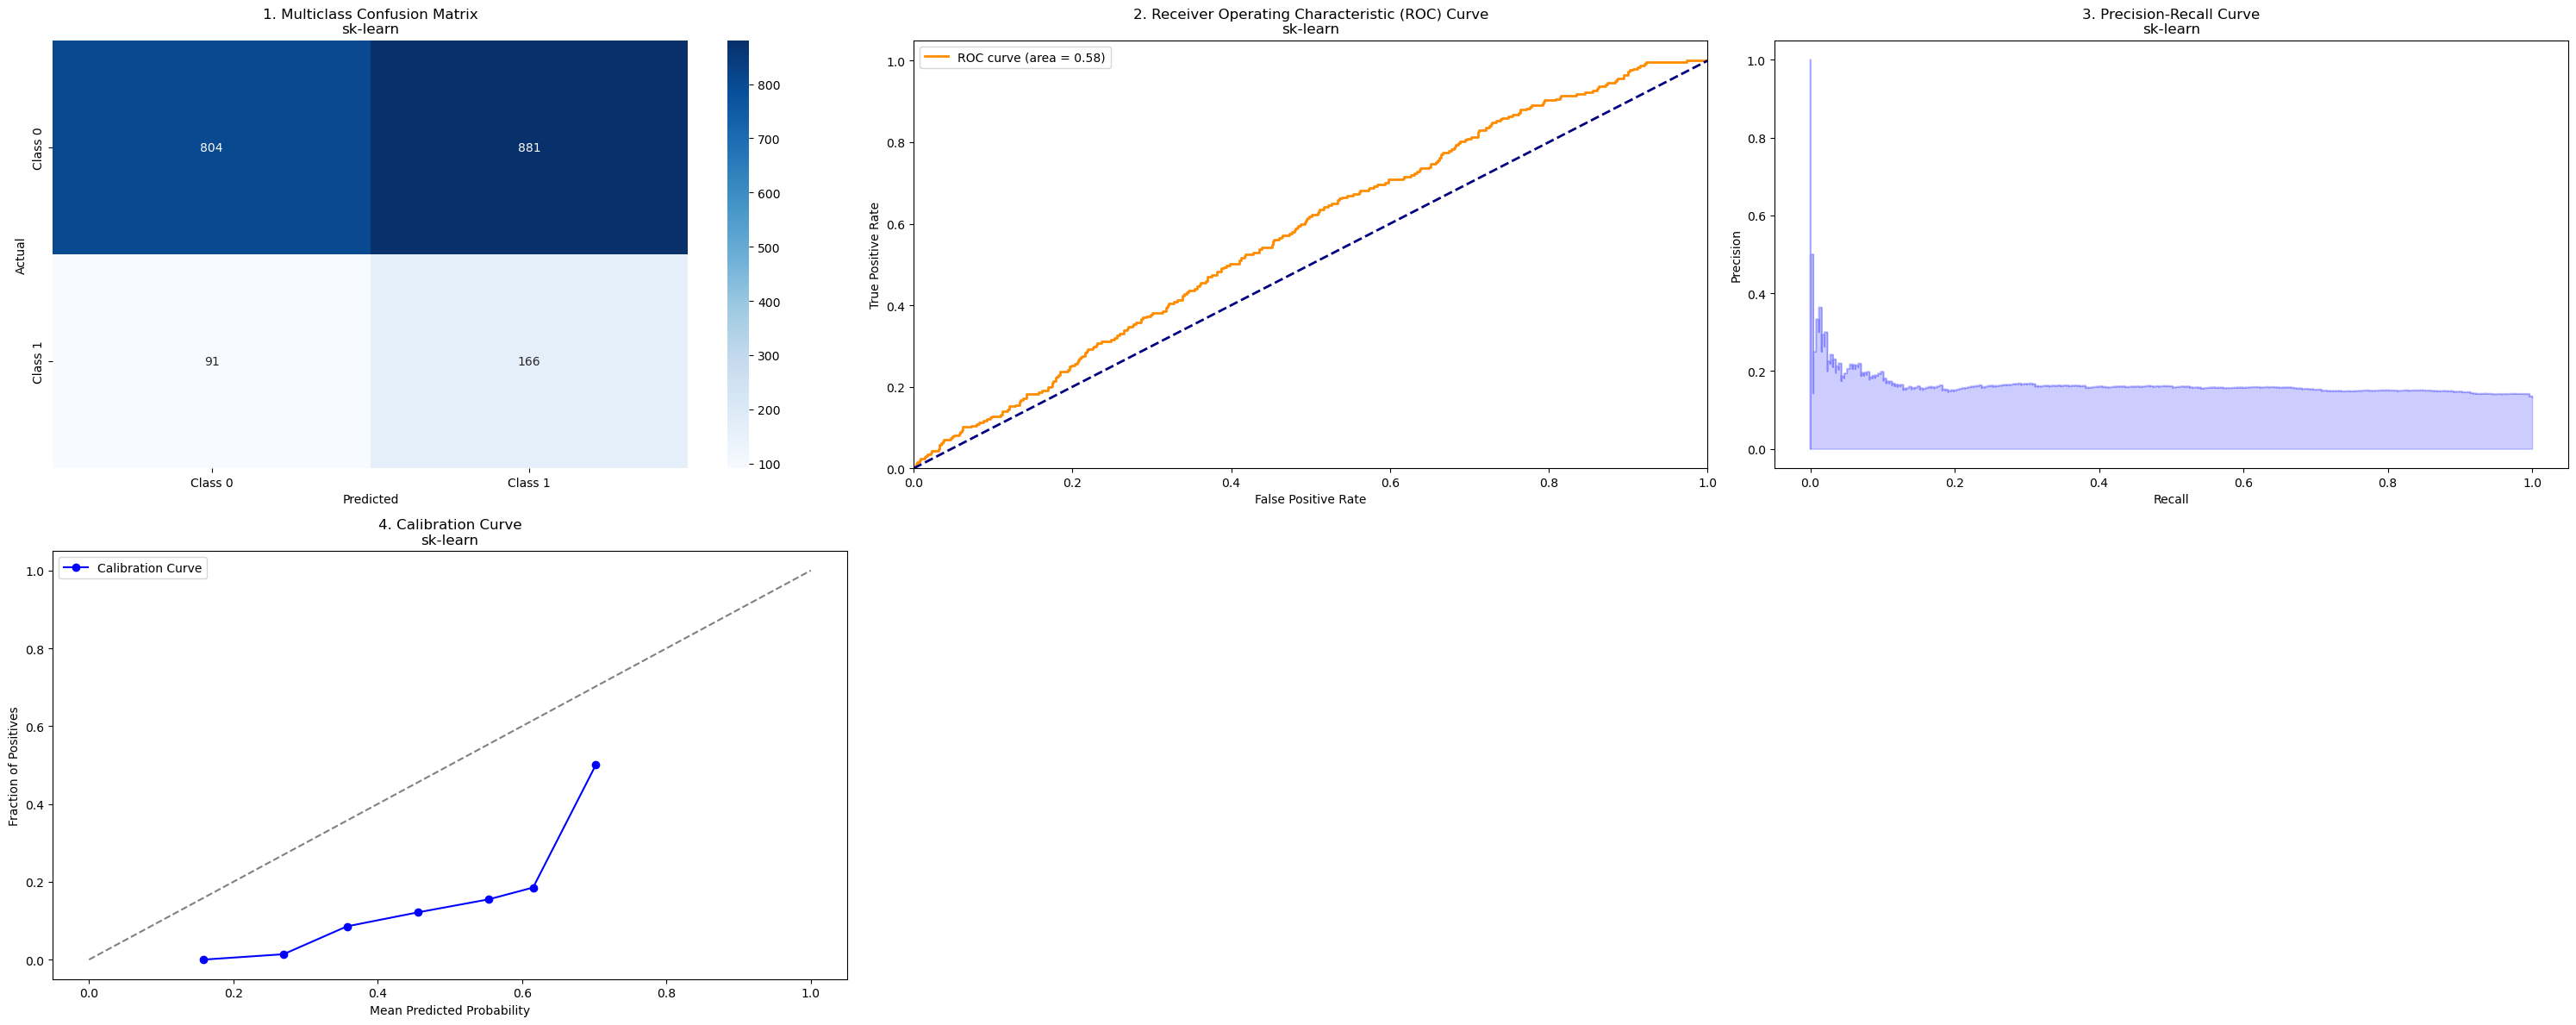

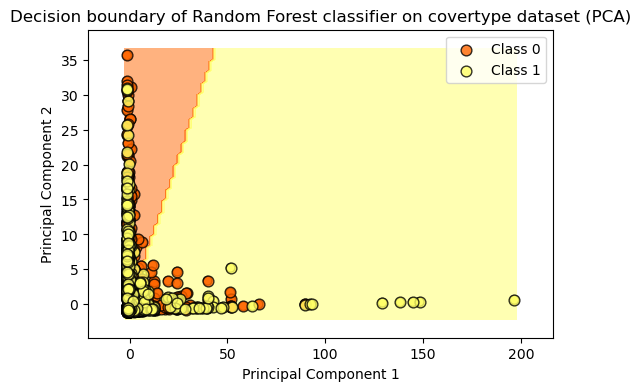

😀


In [11]:
def main():
    # 2. Load the Dataset ()
    dataset_name = 'credit.csv'
    try:
        data, time_series = load_dataset(dataset_name, ',')
    except Exception as e:
        print(f"An error occurred while loading the dataset: {e}")
        exit()

    # Specify the target variable
    target_variable = 'Target'
    # Check if data is already a DataFrame
   
    try:
        if not isinstance(data, pd.DataFrame):
            print(f"Converting {dataset_name} from {type(data)} to a data frame.")
            if isinstance(data, str):
                data_frame = pd.read_csv(io.StringIO(data))
            elif isinstance(data, Bunch):
                # Convert the data to a DataFrame
                data_frame = pd.DataFrame(data.data, columns=data.feature_names)
                data_frame[target_variable]= data.target
                
            else:
                data_frame = pd.DataFrame(data)
        else:
            # print(f"Data from {dataset_name} is already a data frame.")
            data_frame =data
    except Exception as e:
        print("Error:", e)
    
    drop_feature_list = ['ID']

    transformed_data = data_frame.drop(columns= drop_feature_list)
    data_to_process = transformed_data
    data_processed, numerical_columns, categorical_columns = data_preprocess(data_to_process, True) 
    y = data_processed[target_variable]
    # print(set(y))
    drop_column_list = [target_variable]
    # selected_features = None
    selected_features =[
        'Total_income', 'Account_length','Age','Years_employed','Work_phone'
    ]
    print(f"Selected Features are: {selected_features}")
    if selected_features:
        X = data_processed[selected_features]
    else:
        X = data_processed.drop(columns =  drop_column_list)
    
    # 5. Fit the classification models/pipelines
    degree_list =[1,2]
    top_importances =10
    testsize=0.2
    random_seed=42
    model_step_name = 'classification_model'
    best_model_name = None
    best_model_name, best_model_info, feature_names, feature_importance_df = fit_classification_models(X,y,testsize,model_step_name, degree_list,random_seed)
          
    # 6. Visualize Model Performance 
    if best_model_name is None:
        best_model_info = "1"
        best_model_name = "Random Forest Classifier (Degree 1)"
    plot_all_metrics(best_model_name, best_model_info, X,y, testsize,model_step_name,feature_importance_df, top_importances, random_seed, target_variable)
    
    # Play a macOS system sound to signal “Code execution complete.”
    os.system('afplay /System/Library/Sounds/Ping.aiff')
    # Display a smiley emoji in Jupyter Notebook cell
    print('\U0001F600')
if __name__ == "__main__":
    main()